In [1]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

In [10]:
existing_tlc_data_path = "/RSE/RLDS/work/snagendra/fuzzing_data/raft/new_experiments"
waypointrl_data_path = "/local/snagendra/dist-rl-testing/results/event-traces/"

In [11]:
# Loading existing data

with open(os.path.join(existing_tlc_data_path, "0_data.json")) as data_file:
    existing_data = json.load(data_file)

In [12]:
# Inspecting the existing data

# existing_data.keys()

# existing_data['tlcstate'].keys()

# len(existing_data['tlcstate']['coverages'])

# len(existing_data['tlcstate']['coverages'][0])

# existing_data['tlcstate']['coverages'][2][0]

# np.mean(existing_data['tlcstate']['coverages'],0)

In [13]:
# Loading WaypointRL data


waypointrl_data = []

for file in os.listdir(waypointrl_data_path):
    cov_file = os.path.join(waypointrl_data_path, file, "BonusMax", "tlccoverage.json")
    with open(cov_file) as cfile:
        cdata = json.load(cfile)
        waypointrl_data.append(cdata['coverages'])

In [14]:
# Computing the comparison

data_to_plot = {
    "tlc" : [],
    "waypointrl": [],
    "random": []
}

data_to_plot['tlc'] = np.mean(existing_data['tlcstate']['coverages'],0)
data_to_plot['waypointrl'] = np.mean(waypointrl_data, 0)
data_to_plot['random'] = np.mean(existing_data['random']['coverages'], 0)

In [31]:
# Inspecting computed data

# len(data_to_plot['waypointrl'])

1001

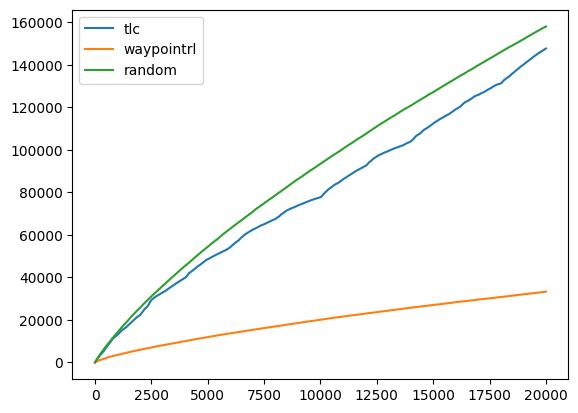

In [15]:
# Plotting the data

minlength = len(data_to_plot['random'])
for k, values in data_to_plot.items():
    if len(values) < minlength:
        minlength = len(values)

fig, ax = plt.subplots()
x = np.arange(minlength)
for k, values in data_to_plot.items():
    ax.plot(x, values[:minlength], label=k)

plt.legend()
plt.show()